### Using Fourier coefficients to understand Gaussian Boson Sampling
A short tutorial on how to calculate Fourier coefficients and two possible uses of them.

#### 1) Calculate the probability of a given GBS experiment outcome
Say that we have a 10 mode GBS circuit given by a random unitary $U$. 

If we wanted to know the probability of the ten threshold detectors outputting the  ${1000000001}$ we can use the `thewalrus` function `threshold_detection_prob` which calculates the Torontonian of the output covariance matrix of the experiment for us. If however we did not have access to this library function we can still manually calculate the probability of the outcome thanks to Fourier analysis! 
Using Fourier analysis of Boolean functions the probability of a bitstring $x$ can be Fourier expanded into a summation.

$ p(\mathbf{x}) = \sum_{\mathbf{s} \in \{0,1\}^n} \hat{p}(\mathbf{s})\,(-1)^{\mathbf{x}\cdot\mathbf{s}} $

Let's use this to calculate the probability of the above measurement.


In [1]:
import sys
import os

# Get the absolute path to the src directory
src_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(src_path)
import circuits
import fourier


In [10]:
# write the desired measurement as a bitstring
outcome = '1000000001'

In [18]:
# run the circuit and obtain the output mean vector and covariance matrix 
# here I chose a squeezing of 1.3, an average value for current gbs experiments
mu, cov = circuits.run_circuit(len(outcome), 1.3)

In [11]:
# get a list of all bitstrings s of same length as the outcome 
bitstrings = fourier.generate_all_strings(len(outcome))
bitstrings

['1111111111',
 '1111111110',
 '1111111101',
 '1111111100',
 '1111111011',
 '1111111010',
 '1111111001',
 '1111111000',
 '1111110111',
 '1111110110',
 '1111110101',
 '1111110100',
 '1111110011',
 '1111110010',
 '1111110001',
 '1111110000',
 '1111101111',
 '1111101110',
 '1111101101',
 '1111101100',
 '1111101011',
 '1111101010',
 '1111101001',
 '1111101000',
 '1111100111',
 '1111100110',
 '1111100101',
 '1111100100',
 '1111100011',
 '1111100010',
 '1111100001',
 '1111100000',
 '1111011111',
 '1111011110',
 '1111011101',
 '1111011100',
 '1111011011',
 '1111011010',
 '1111011001',
 '1111011000',
 '1111010111',
 '1111010110',
 '1111010101',
 '1111010100',
 '1111010011',
 '1111010010',
 '1111010001',
 '1111010000',
 '1111001111',
 '1111001110',
 '1111001101',
 '1111001100',
 '1111001011',
 '1111001010',
 '1111001001',
 '1111001000',
 '1111000111',
 '1111000110',
 '1111000101',
 '1111000100',
 '1111000011',
 '1111000010',
 '1111000001',
 '1111000000',
 '1110111111',
 '1110111110',
 '11101111

In [12]:
# implement the summation over all bitstring to calculate the probability of the outcome
prob = 0
outcome_int = int(outcome, 2)
for el in bitstrings:
    sign = -1 if int.bit_count(outcome_int & int(el, 2)) % 2 == 1 else 1
    prob += sign * fourier.fourier_coefficient([int(char) for char in el], cov)


In [13]:
# let's compare out results with the thewalrus library function result
from thewalrus import threshold_detection_prob

walrus_prob = threshold_detection_prob(mu, cov, [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]).real

print(f'The probability calculated with Fourier coefficients is: {prob}')
print(f'The probability calculated with the library function is: {walrus_prob}')

The probability calculated with Fourier coefficients is: 3.580061281646739e-05
The probability calculated with the library function is: 3.5800612816477484e-05


Pretty good! We have confirmed that our alternative method is accurate!

But Fourier coefficients are useful for much more than probabilities. We can use them to calculate the
cumulants of the probability distributions of these systems and analyse their hardness. 
As a simple example we will calculate the average Fourier coefficient as a function of order over 100 random 
unitaries. This can help us get a preliminary understanding of the structure of these probability distributions.

#### 2) Calculating average Fourier coefficients over random unitaries
We will take the absolute value of the coefficients before taking the average as some of them can be negative and we are interested in the absolute quantity of each order more than the strict average. We will also omit the zero-th order as this is trivially $\frac{1}{2^n}$.



In [14]:
# find all lists of bits (bitstrings) of length 10
bitstrings = []
for k in range(1, 11):
    bitstrings += fourier.kbits(10, k)

bitstrings

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1,

In [15]:
# record the data in a csv file for easy processing later
import csv
import numpy as np

with open("fourier_coefficients_10_modes.csv", "w", newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Unitary", "Order", "Coefficient"])

    # calculate all Fourier coefficients for 100 random unitaries
    for i in range(100):
        mu, cov = circuits.run_circuit(10, 1.3)
        for string in bitstrings:
            writer.writerow([i, np.sum(string), fourier.fourier_coefficient(string, cov)])

[Text(0.5, 0, 'Order'), Text(0, 0.5, 'Mean Fourier coefficient')]

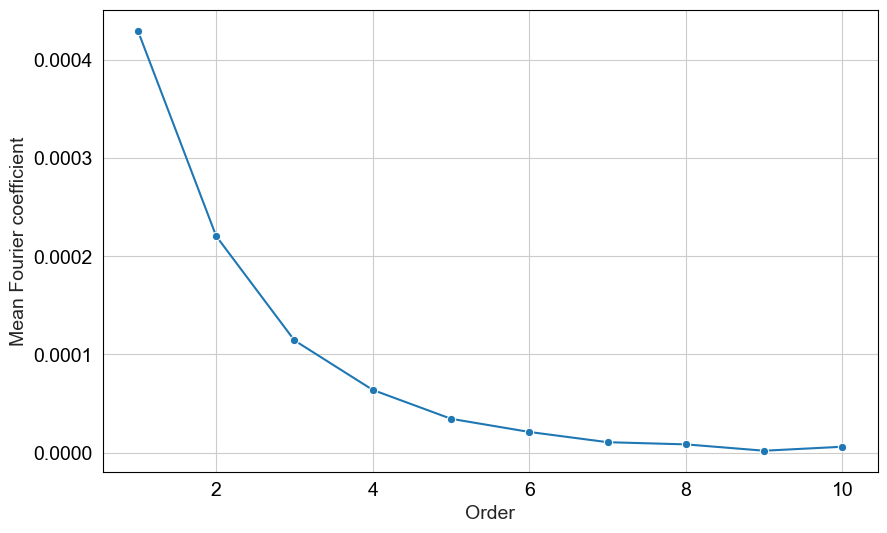

In [16]:
# visualise the results
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd

# styling properties
sns.set_style("whitegrid")
mpl.rcParams.update({
    'font.size': 14,
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.facecolor': 'none',
    'figure.facecolor': 'none'
})

df = pd.read_csv("fourier_coefficients_10_modes.csv")
df["Coefficient"] = df["Coefficient"].abs()

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(df, x="Order", y="Coefficient", marker="o", errorbar=None).set(xlabel="Order",
                                                                            ylabel="Mean Fourier coefficient")


This simple calculation shows us that the average behaviour of Fourier coefficients of ideal (non-noisy) GBS
is that of exponential decay, which can have important consequences for the behaviour of the cumulants of these systems.